## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn import svm  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/iris.csv',
                      index_col = 'Unnamed: 0')

df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [3]:
# 문자로 된 범주형 데이터를 숫자로 변환한 컬럼 추가
df_iris['Species_No'] = df_iris['Species'].apply(lambda x: 0 if 'setosa' == x 
                                                     else( 1 if 'versicolor' == x
                                                     else 2 ))

df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_No
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,2
147,6.3,2.5,5.0,1.9,virginica,2
148,6.5,3.0,5.2,2.0,virginica,2
149,6.2,3.4,5.4,2.3,virginica,2


# x값(예측변수), y값(목표변수) 설정

In [4]:
# 목표변수와 나머지 변수들을 따로 저장

x = df_iris.iloc[ : , 0:4 ]
y = df_iris[ 'Species' ]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({'versicolor': 37, 'setosa': 35, 'virginica': 33})

Counter({'virginica': 17, 'setosa': 15, 'versicolor': 13})


# 모델 생성 및 학습

## kNN 모델 생성
- `sklearn.neighbors.KNeighborsClassifier()`
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

def knn(k, w):
    classes_knn = KNeighborsClassifier( n_neighbors = k,
                                        weights = w,
                                        metric = 'euclidean' )
    return classes_knn

## train 데이터로 학습 수행
- `.fit()`
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit

In [7]:
# k = 15, weight = 'distance' 조건으로 모델 학습
model_knn = knn(15, 'distance').fit( x_train, y_train )

In [8]:
# 모델의 정답에 대한 정보 확인
model_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# 예측 및 평가

## 학습된 모델로 예측 수행
- `.predict()`
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict

In [9]:
# test 데이터로 라벨 예측
y_pred = model_knn.predict( x_test )

pd.DataFrame( {'Species_True' : y_test,
               'Species_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} )

,Species_True,Species_Predict,Pred_Result
37,setosa,setosa,True
32,setosa,setosa,True
141,virginica,virginica,True
5,setosa,setosa,True
122,virginica,virginica,True
40,setosa,setosa,True
130,virginica,virginica,True
144,virginica,virginica,True
150,virginica,virginica,True
120,virginica,versicolor,False


## 평가

### Confusion Metrix

In [10]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 14]], dtype=int64)

In [11]:
pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )

real,setosa,versicolor,virginica
pred,,,
setosa,15,0,0
versicolor,0,13,0
virginica,0,3,14


### 분석 지표
- `sklearn.metrics.accuracy_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [12]:
# Accuracy
model_knn.score( x_test, y_test )

0.9333333333333333

In [13]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9333333333333333

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.812     1.000     0.897        13
   virginica      1.000     0.824     0.903        17

    accuracy                          0.933        45
   macro avg      0.938     0.941     0.933        45
weighted avg      0.946     0.933     0.934        45




### 데이터별 예측 확률
- `.predict_proba()`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba

In [14]:
proba = model_knn.predict_proba(x_test)

df_proba = pd.DataFrame( proba, columns = model_knn.classes_ )
df_proba.head()

,setosa,versicolor,virginica
0,1.0,0.000000,0.000000
1,1.0,0.000000,0.000000
2,0.0,0.000000,1.000000
3,1.0,0.000000,0.000000
4,0.0,0.445633,0.554367


### ROC curve / AUC
- `sklearn.metrics.roc_curve()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [27]:
# AUC 계산
print('AUC: ', roc_auc_score( y_test, df_proba,
                              multi_class = 'ovo' ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, df_proba,
                                  pos_label=2)

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

AUC:  1.0


ValueError: y should be a 1d array, got an array of shape (45, 3) instead.

AUC:  1.0


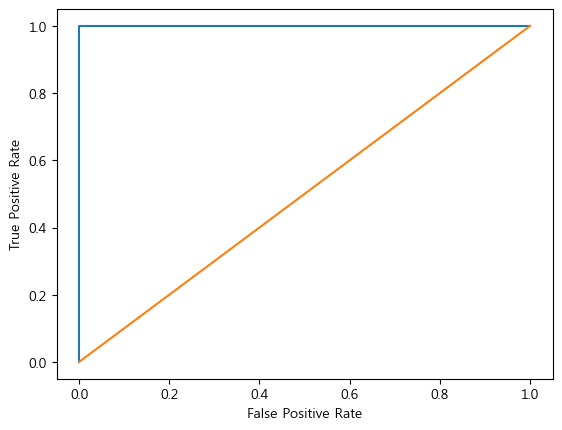

In [25]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_1 = y_test.apply(lambda x: 1 if 'setosa' == x else 0 )

# 'sotosa' 에 대한 proba 추출'
proba_1 = df_proba['setosa']

# AUC 계산
print('AUC: ', roc_auc_score( result_1, proba_1 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_1,
                                  pos_label='setosa')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

AUC:  1.0


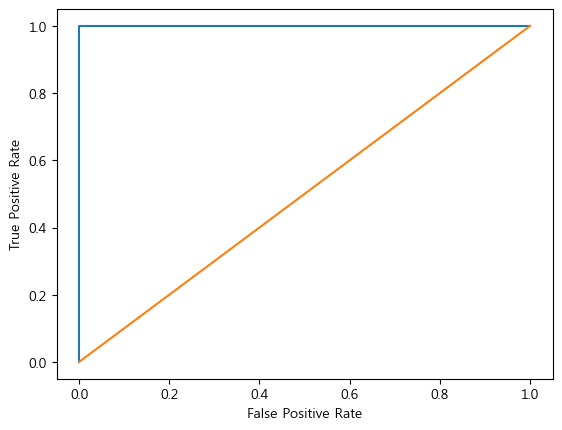

In [22]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_2 = y_test.apply(lambda x: 1 if 'versicolor' == x else 0 )

# 'versicolor' 에 대한 proba 추출'
proba_2 = df_proba['versicolor']

# AUC 계산
print('AUC: ', roc_auc_score( result_2, proba_2 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_2,
                                  pos_label='versicolor')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

AUC:  1.0


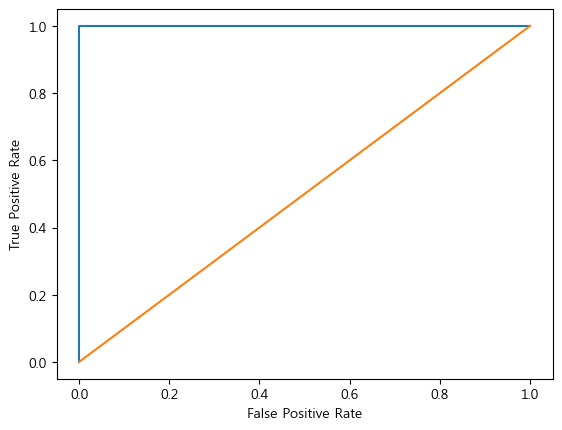

In [23]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_3 = y_test.apply(lambda x: 1 if 'virginica' == x else 0 )

# 'virginica' 에 대한 proba 추출'
proba_3 = df_proba['virginica']

# AUC 계산
print('AUC: ', roc_auc_score( result_3, proba_3 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_3,
                                  pos_label='virginica')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [19]:
pd.DataFrame( {'setosa':result_1,
               'proba_1':proba_1,
               'versicolor':result_2,
               'proba_2':proba_2,
               'virginica':result_3,
               'proba_3':proba_3} ).head()

,setosa,proba_1,versicolor,proba_2,virginica,proba_3
0,NaN,1.0,NaN,0.000000,NaN,0.000000
1,NaN,1.0,NaN,0.000000,NaN,0.000000
2,1.0,0.0,0.0,0.000000,0.0,1.000000
3,NaN,1.0,NaN,0.000000,NaN,0.000000
4,1.0,0.0,0.0,0.445633,0.0,0.554367


In [20]:
# 새로운 테스트 데이터로 예측하기
model_knn.predict( [ [5.1, 3.5, 4.0, 0.2] ] )

array(['versicolor'], dtype=object)

In [21]:
print(c)

NameError: name 'c' is not defined

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_test)

y_test_encord = encoder.transform(y_test)
y_test_encord

In [ ]:
pd.DataFrame( {'y_test' : y_test,
               'y_test_encord' : y_test_encord} ).head()

# 시각화

- `matplotlib.colors.ListedColormap`
- https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html

## 2차원 시각화를 위한 x값(예측변수), y값(목표변수) 설정

In [ ]:
# 목표변수와 나머지 변수들을 따로 저장

x = df_iris.iloc[ : , [0, 3] ]
y = df_iris[ 'Species' ]
x

In [ ]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

In [ ]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for k, w in zip( [15, 15], ['uniform', 'distance'] ):
    # we create an instance of Neighbours Classifier and fit the data.
    model_knn = knn(k, w).fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
    y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    z = model_knn.predict( np.c_[xx.ravel(), yy.ravel()] )
    
    z = np.where( z == 'setosa', 2, z )
    z = np.where( z == 'versicolor', 0, z )
    z = np.where( z == 'virginica', 1, z )
    
    
    # Put the result into a color plot
    z = z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, cmap = cmap_light)

    # Plot also the training points
    sb.scatterplot( x = x_train.iloc[:, 0],
                    y = x_train.iloc[:, 1],
                    hue = y_train,
                    palette = cmap_bold, alpha = 1.0, edgecolor="black")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (k, w))
    plt.xlabel(x_train.columns[0])
    plt.ylabel(x_train.columns[1])

plt.show()